### Problem Statement:

You are provided with the marketing spend data of an online advertising firm who
are looking to optimize their cost spend on ads while increasing their yield in
terms of marketing goals.

### Objective:

Analyze the data and find actionable insights in the given data, come up with
strategies that use Data Science and AI techniques to optimize their marketing
spends for maximum yield.


#### Tasks to be Performed:
###### 1. Preprocess the data for feature selection and feature engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the Data
data=pd.read_csv('online_advertising_performance_data.csv')
data

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,NaN,NaN
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,NaN,NaN
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000,NaN,NaN
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000,NaN,NaN


In [4]:
data.info()  #checking info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [5]:
data.isna().sum() # checking null values from dataset

month                          0
day                            0
campaign_number                0
user_engagement                0
banner                         0
placement                    413
displays                       0
cost                           0
clicks                         0
revenue                        0
post_click_conversions         0
post_click_sales_amount        0
Unnamed: 12                15408
Unnamed: 13                15408
dtype: int64

In [6]:
data=data.drop(columns=['Unnamed: 12','Unnamed: 13'])  #removing unknown columns
data

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000


In [7]:
data=data.dropna() # removing null values
data

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000


In [8]:
data.isnull().sum() #checking null values after remving nulls

month                      0
day                        0
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_conversions     0
post_click_sales_amount    0
dtype: int64

In [9]:
data.duplicated().sum() # checking duplicates

5

In [10]:
data=data.drop_duplicates() # removing duplicates
data

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
15397,June,30,camp 3,Medium,728 x 90,abc,911,0.5138,6,0.3378,0,0.0000
15398,June,30,camp 3,Medium,728 x 90,def,5963,0.7884,40,2.2513,3,69.4256
15399,June,30,camp 3,Medium,728 x 90,ghi,710,0.9867,22,1.2386,0,0.0000
15400,June,30,camp 3,Medium,728 x 90,jkl,490,0.1686,8,0.4504,0,0.0000


In [11]:
import calendar

# Map month names to month numbers
data['Month_Number'] = data['month'].apply(lambda x: list(calendar.month_name).index(x))
data['Month_Number'].info()

<class 'pandas.core.series.Series'>
Index: 14990 entries, 0 to 15401
Series name: Month_Number
Non-Null Count  Dtype
--------------  -----
14990 non-null  int64
dtypes: int64(1)
memory usage: 234.2 KB


In [12]:
def convert_to_square_feet(banner):
    width, height = map(int, banner.split(' x '))
    return (width * height) / 144  # 144 sq inches = 1 sq foot

# Apply the function to the Banner column
data['banner_Square_Feet'] = data['banner'].apply(convert_to_square_feet)# convert banner size to square feet
data['banner_Square_Feet']

0        666.666667
1        666.666667
2        666.666667
3        666.666667
4        666.666667
            ...    
15397    455.000000
15398    455.000000
15399    455.000000
15400    455.000000
15401    455.000000
Name: banner_Square_Feet, Length: 14990, dtype: float64

In [13]:
data

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Month_Number,banner_Square_Feet
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,4,666.666667
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,4,666.666667
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,4,666.666667
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,4,666.666667
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,4,666.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397,June,30,camp 3,Medium,728 x 90,abc,911,0.5138,6,0.3378,0,0.0000,6,455.000000
15398,June,30,camp 3,Medium,728 x 90,def,5963,0.7884,40,2.2513,3,69.4256,6,455.000000
15399,June,30,camp 3,Medium,728 x 90,ghi,710,0.9867,22,1.2386,0,0.0000,6,455.000000
15400,June,30,camp 3,Medium,728 x 90,jkl,490,0.1686,8,0.4504,0,0.0000,6,455.000000


`Click-Through Rate (CTR)` = Measures how many users click on the ad compared to those who see it.

In [14]:
data['CTR'] = (data['clicks'] / data['displays']) * 100
data.head(2)

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Month_Number,banner_Square_Feet,CTR
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,4,666.666667,0.000000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,4,666.666667,0.783342


`Conversion Rate` = Measures how many users take the desired action after clicking.

In [15]:
data['conversion Rate'] = (data['post_click_conversions'] / data['clicks']) * 100
print(data[['day', 'campaign_number', 'conversion Rate']].head())


   day campaign_number  conversion Rate
0    1          camp 1              NaN
1    1          camp 1        14.556962
2    1          camp 1        49.367089
3    1          camp 1        34.354120
4    1          camp 1         0.000000


`Revenue per Click`= Measures the average revenue generated per click

In [16]:
data['Revenue per Click'] = data['revenue'] / data['clicks']
data.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Month_Number,banner_Square_Feet,CTR,conversion Rate,Revenue per Click
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,4,666.666667,0.000000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,4,666.666667,0.783342,14.556962,0.183365
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,4,666.666667,1.074757,49.367089,0.183399
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,4,666.666667,1.048704,34.354120,0.183436
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,4,666.666667,0.181159,0.000000,0.183400


In [17]:
data.isna().sum()  # checking null values of new columns which we extracted

month                         0
day                           0
campaign_number               0
user_engagement               0
banner                        0
placement                     0
displays                      0
cost                          0
clicks                        0
revenue                       0
post_click_conversions        0
post_click_sales_amount       0
Month_Number                  0
banner_Square_Feet            0
CTR                          21
conversion Rate            4455
Revenue per Click          4484
dtype: int64

In [18]:
data=data.fillna('0')  # imputing null value of the nan which is created for Zero devision
data.isna().sum() 

month                      0
day                        0
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_conversions     0
post_click_sales_amount    0
Month_Number               0
banner_Square_Feet         0
CTR                        0
conversion Rate            0
Revenue per Click          0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 0 to 15401
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    14990 non-null  object 
 1   day                      14990 non-null  int64  
 2   campaign_number          14990 non-null  object 
 3   user_engagement          14990 non-null  object 
 4   banner                   14990 non-null  object 
 5   placement                14990 non-null  object 
 6   displays                 14990 non-null  int64  
 7   cost                     14990 non-null  float64
 8   clicks                   14990 non-null  int64  
 9   revenue                  14990 non-null  float64
 10  post_click_conversions   14990 non-null  int64  
 11  post_click_sales_amount  14990 non-null  float64
 12  Month_Number             14990 non-null  int64  
 13  banner_Square_Feet       14990 non-null  float64
 14  CTR                      14

In [20]:
data.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Month_Number,banner_Square_Feet,CTR,conversion Rate,Revenue per Click
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,4,666.666667,0.0,0,0
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,4,666.666667,0.783342,14.556962,0.183365
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,4,666.666667,1.074757,49.367089,0.183399
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,4,666.666667,1.048704,34.35412,0.183436
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,4,666.666667,0.181159,0.0,0.1834


In [21]:
data['CTR'] = pd.to_numeric(data['CTR'], errors='coerce')
data['conversion Rate'] = pd.to_numeric(data['conversion Rate'], errors='coerce')
data['Revenue per Click'] = pd.to_numeric(data['Revenue per Click'], errors='coerce')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 0 to 15401
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    14990 non-null  object 
 1   day                      14990 non-null  int64  
 2   campaign_number          14990 non-null  object 
 3   user_engagement          14990 non-null  object 
 4   banner                   14990 non-null  object 
 5   placement                14990 non-null  object 
 6   displays                 14990 non-null  int64  
 7   cost                     14990 non-null  float64
 8   clicks                   14990 non-null  int64  
 9   revenue                  14990 non-null  float64
 10  post_click_conversions   14990 non-null  int64  
 11  post_click_sales_amount  14990 non-null  float64
 12  Month_Number             14990 non-null  int64  
 13  banner_Square_Feet       14990 non-null  float64
 14  CTR                      14

In [23]:
data.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Month_Number,banner_Square_Feet,CTR,conversion Rate,Revenue per Click
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,4,666.666667,0.000000,0.000000,0.000000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,4,666.666667,0.783342,14.556962,0.183365
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,4,666.666667,1.074757,49.367089,0.183399
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,4,666.666667,1.048704,34.354120,0.183436
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,4,666.666667,0.181159,0.000000,0.183400


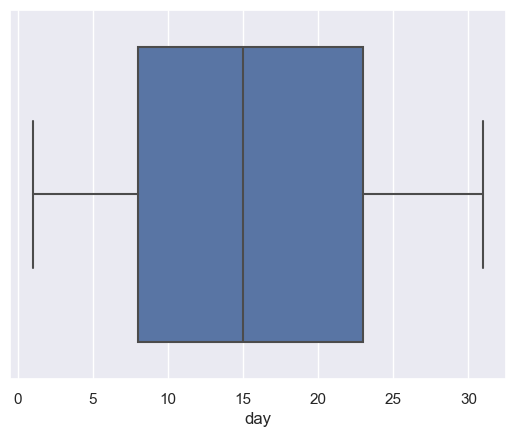

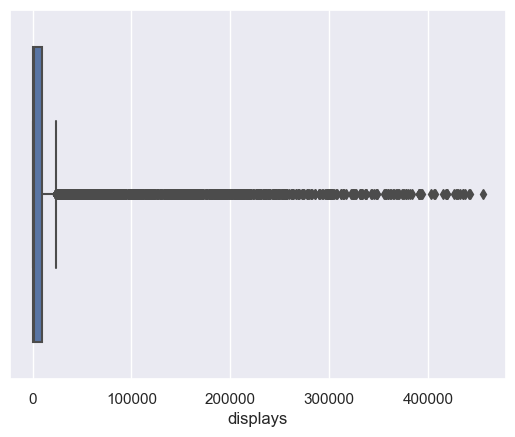

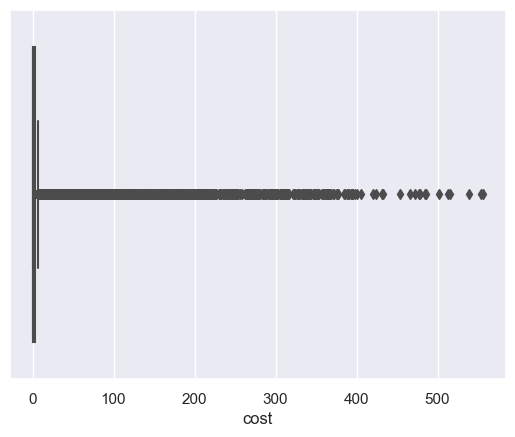

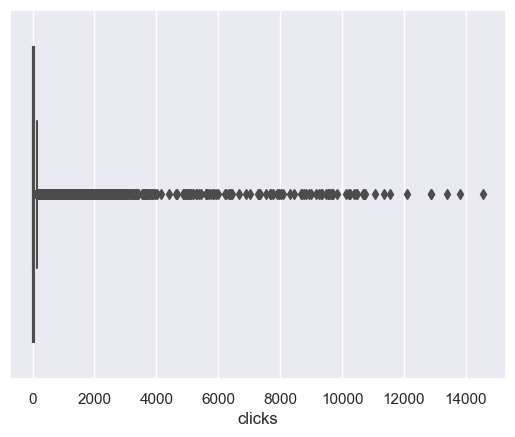

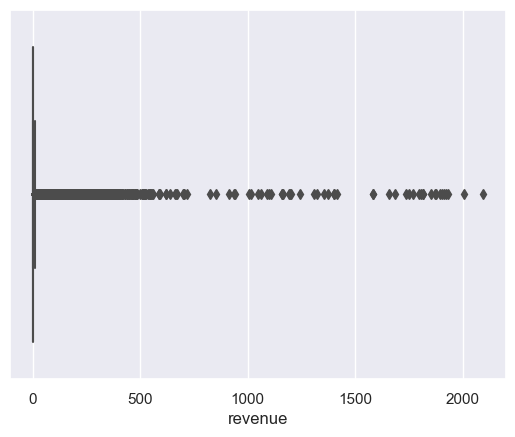

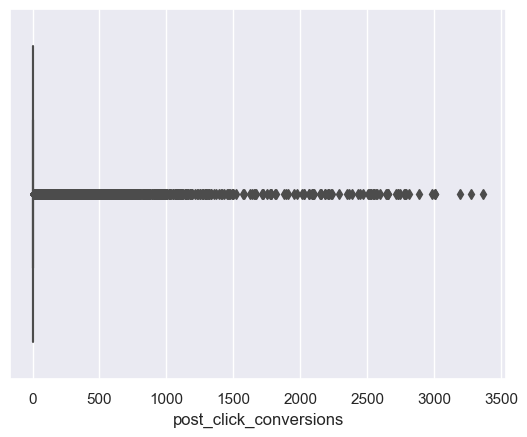

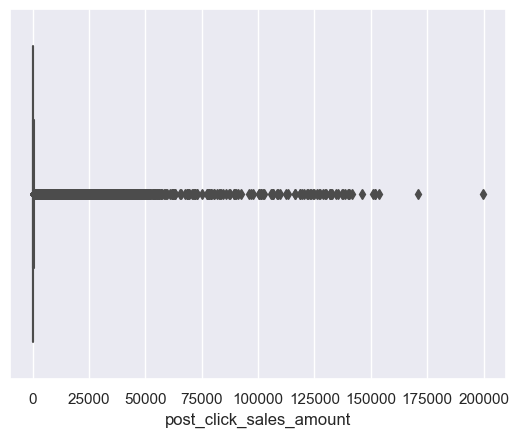

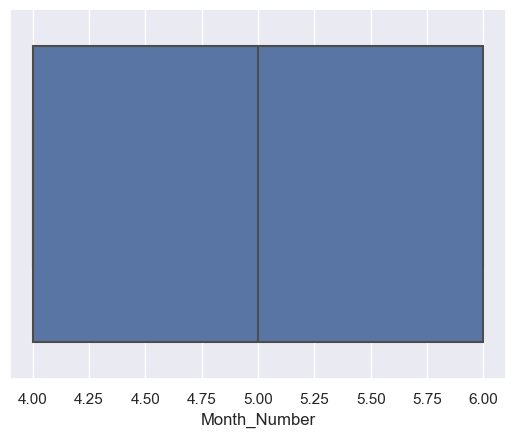

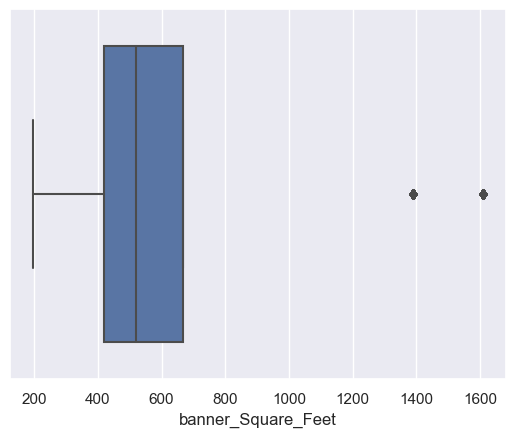

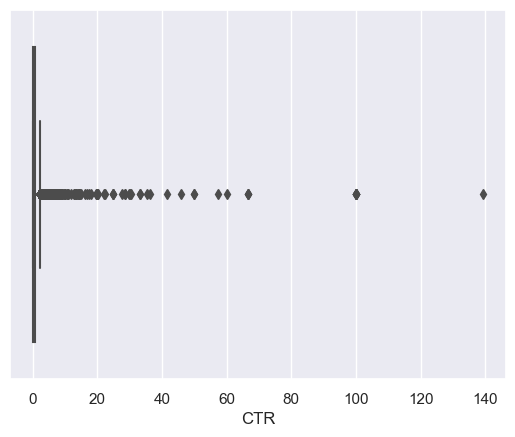

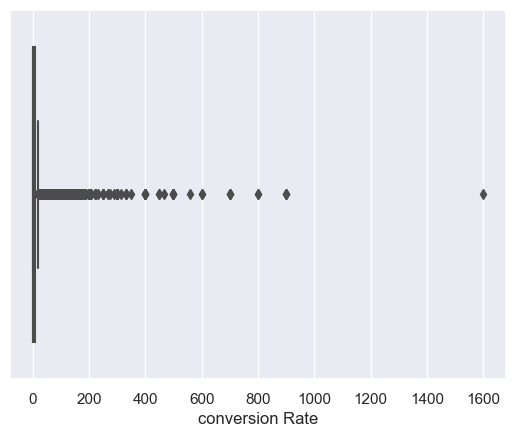

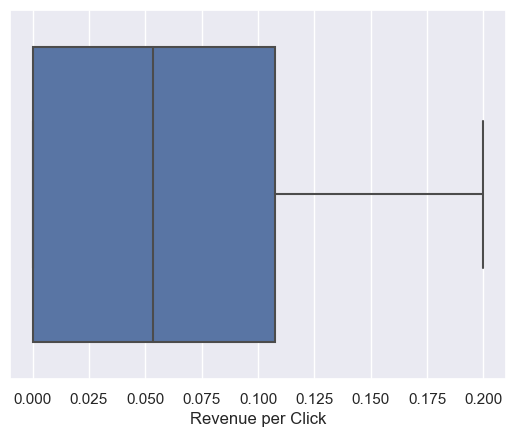

In [24]:
col=data.columns
for i in col:
    if data[i].dtype!='object':
        sns.boxplot(data=data,x=data[i])
        plt.show()

In [25]:
for i in col:
    if data[i].dtype!='object':
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR=Q3-Q1
        uf = Q3 + (1.5*IQR)
        lf = Q1 - (1.5*IQR)
        data_clean=data[(data[i]<=uf) & (data[i]>=lf)]

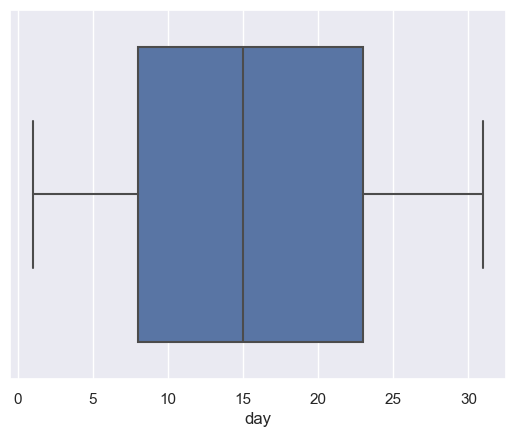

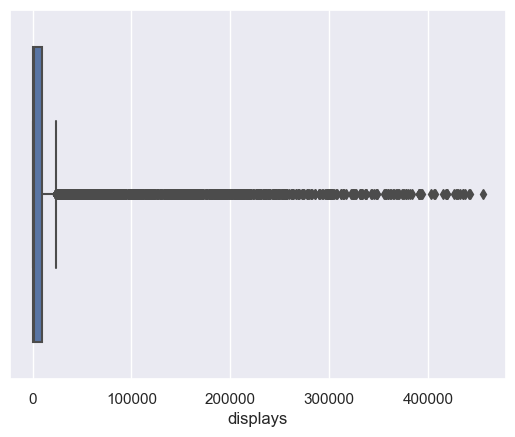

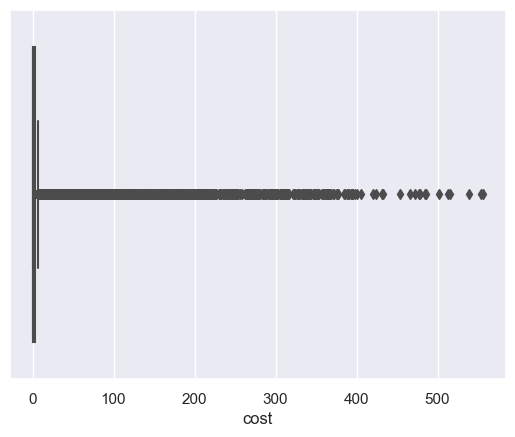

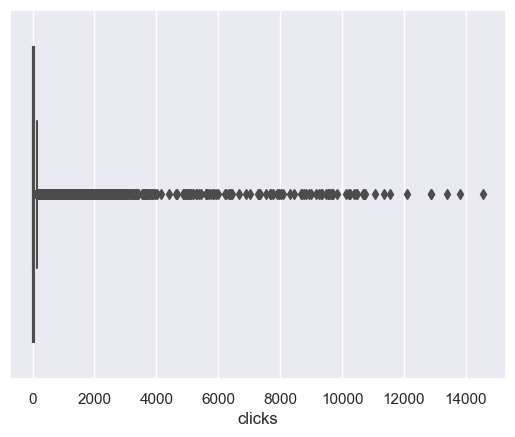

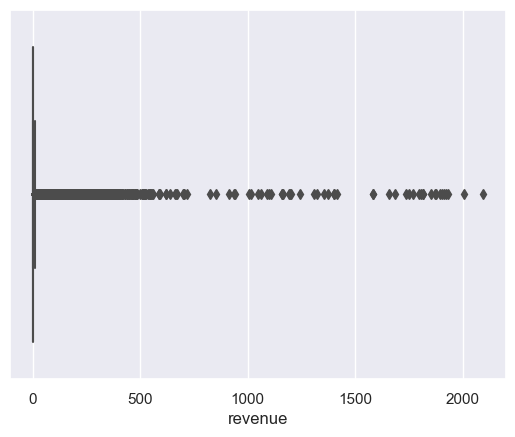

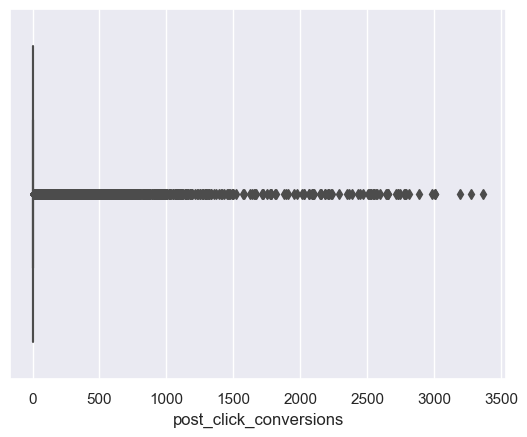

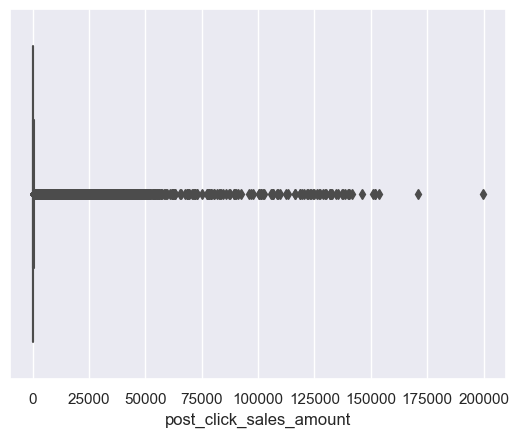

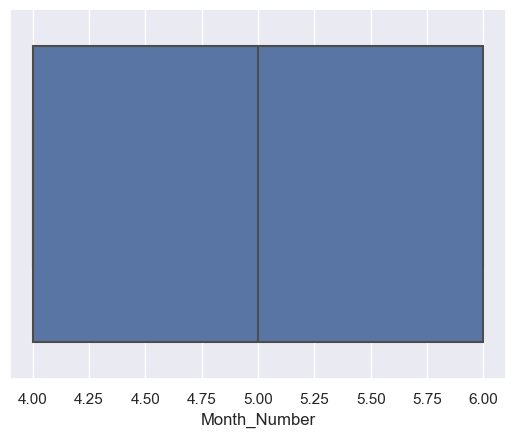

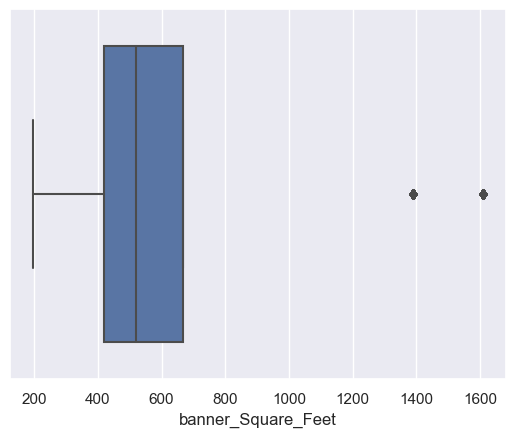

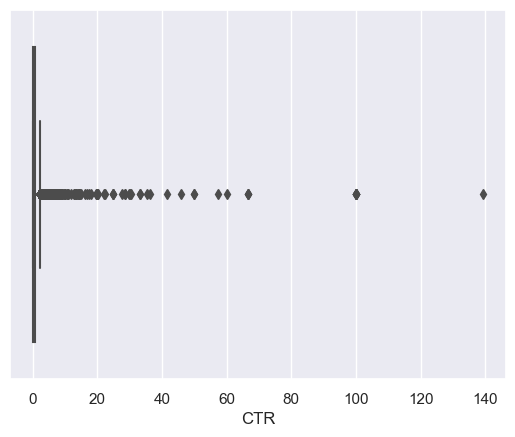

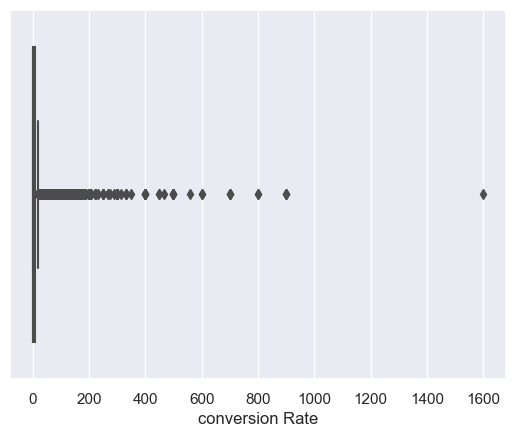

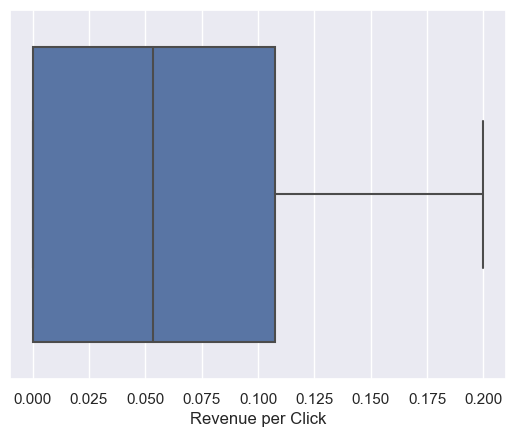

In [26]:
col=data_clean.columns
for i in col:
    if data_clean[i].dtype!='object':
        sns.boxplot(data=data_clean,x=data[i])
        plt.show()

In [27]:
data_clean

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Month_Number,banner_Square_Feet,CTR,conversion Rate,Revenue per Click
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,4,666.666667,0.000000,0.000000,0.000000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,4,666.666667,0.783342,14.556962,0.183365
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,4,666.666667,1.074757,49.367089,0.183399
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,4,666.666667,1.048704,34.354120,0.183436
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,4,666.666667,0.181159,0.000000,0.183400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397,June,30,camp 3,Medium,728 x 90,abc,911,0.5138,6,0.3378,0,0.0000,6,455.000000,0.658617,0.000000,0.056300
15398,June,30,camp 3,Medium,728 x 90,def,5963,0.7884,40,2.2513,3,69.4256,6,455.000000,0.670803,7.500000,0.056282
15399,June,30,camp 3,Medium,728 x 90,ghi,710,0.9867,22,1.2386,0,0.0000,6,455.000000,3.098592,0.000000,0.056300
15400,June,30,camp 3,Medium,728 x 90,jkl,490,0.1686,8,0.4504,0,0.0000,6,455.000000,1.632653,0.000000,0.056300


In [28]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 0 to 15401
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    14990 non-null  object 
 1   day                      14990 non-null  int64  
 2   campaign_number          14990 non-null  object 
 3   user_engagement          14990 non-null  object 
 4   banner                   14990 non-null  object 
 5   placement                14990 non-null  object 
 6   displays                 14990 non-null  int64  
 7   cost                     14990 non-null  float64
 8   clicks                   14990 non-null  int64  
 9   revenue                  14990 non-null  float64
 10  post_click_conversions   14990 non-null  int64  
 11  post_click_sales_amount  14990 non-null  float64
 12  Month_Number             14990 non-null  int64  
 13  banner_Square_Feet       14990 non-null  float64
 14  CTR                      14

###### 2. Analyze the data for actionable insights by end to end Exploratory Data Analysis

In [29]:
obj=['month','campaign_number','user_engagement', 'banner',
       'placement']

num=[ 'day', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount', 'Month_Number',
       'banner_Square_Feet', 'CTR', 'conversion Rate', 'Revenue per Click']

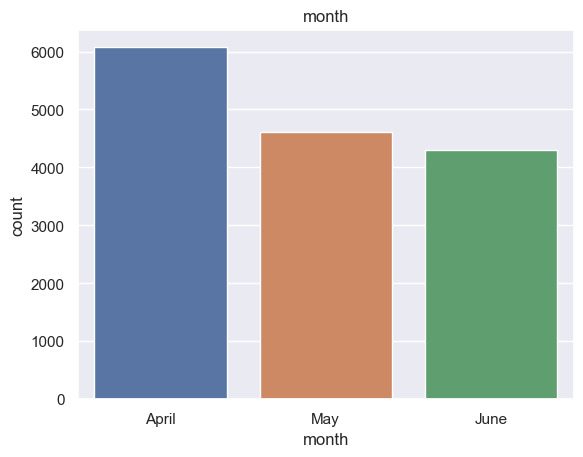

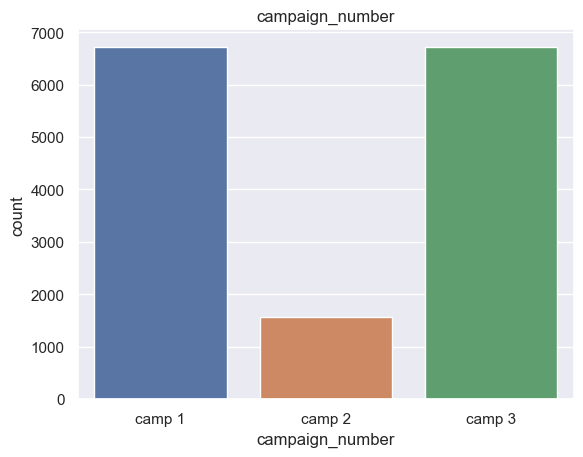

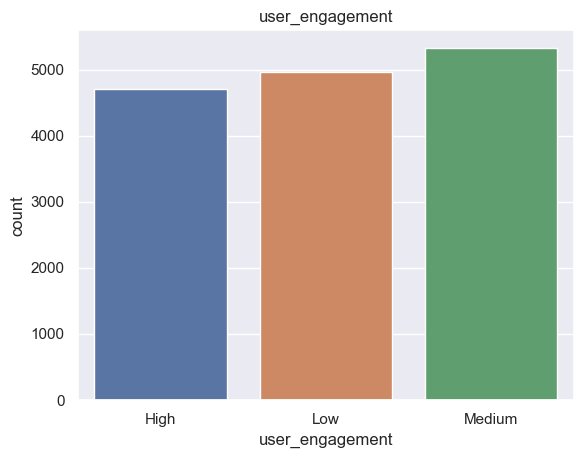

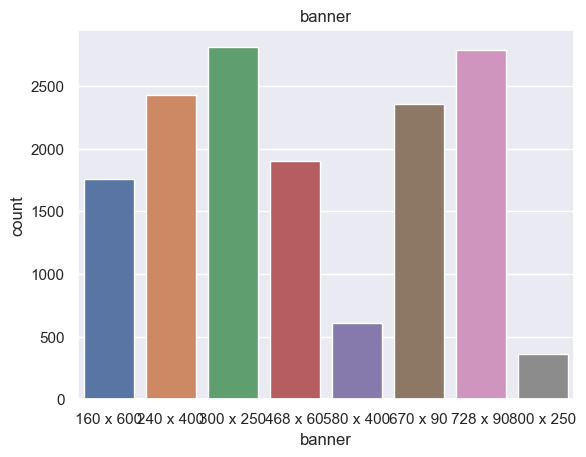

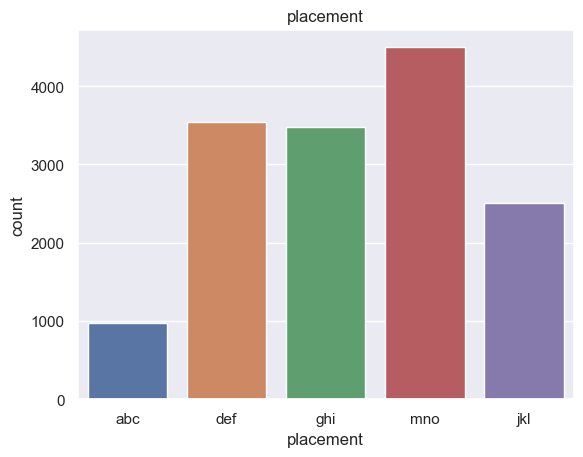

In [30]:
#displaying count plot for categorical data
for i in obj:
        sns.countplot(data=data_clean,x=data[i])
        plt.title(i)
        plt.show()

In [31]:
# checking values which contains infinite values
print(np.isinf(data_clean['CTR']).sum())
print(np.isinf(data_clean['conversion Rate']).sum())

1
29


In [32]:
# droping  infinite values 
data_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
data_clean.dropna(inplace=True)
data_clean.isna().sum()


month                      0
day                        0
campaign_number            0
user_engagement            0
banner                     0
placement                  0
displays                   0
cost                       0
clicks                     0
revenue                    0
post_click_conversions     0
post_click_sales_amount    0
Month_Number               0
banner_Square_Feet         0
CTR                        0
conversion Rate            0
Revenue per Click          0
dtype: int64

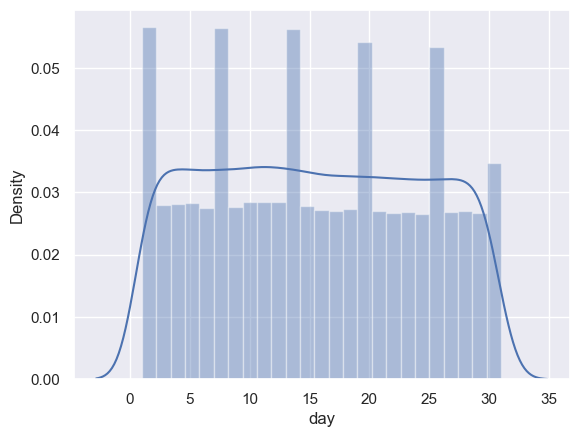

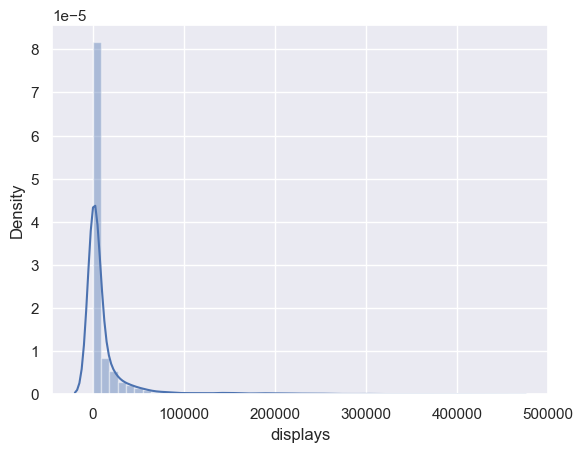

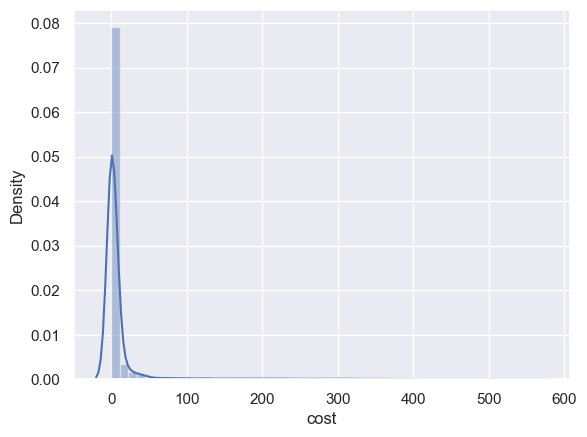

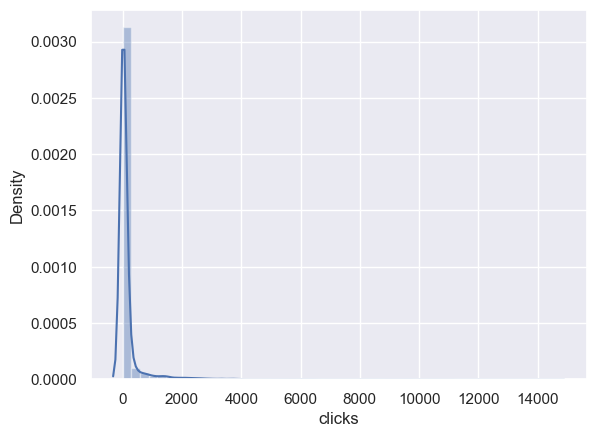

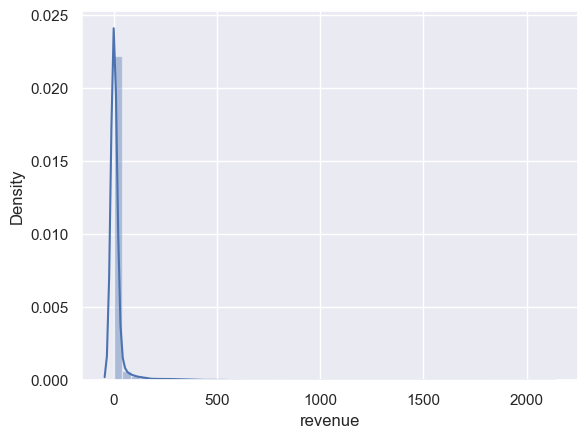

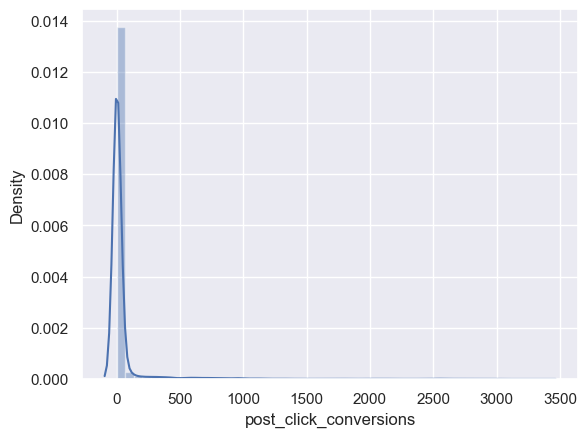

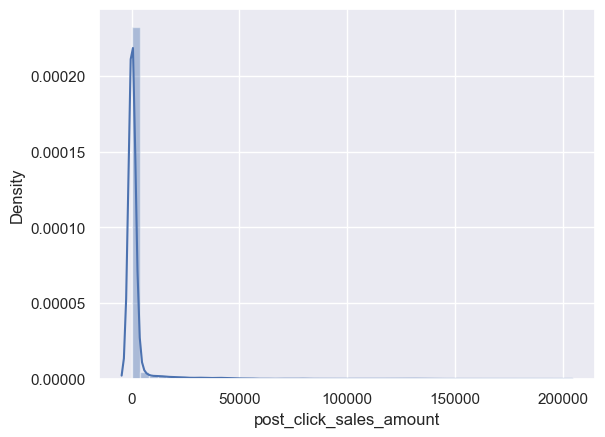

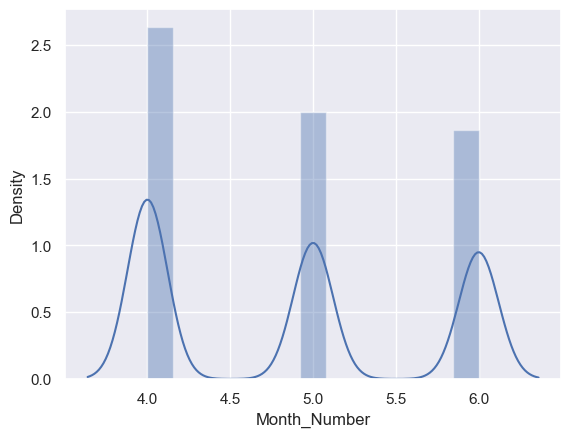

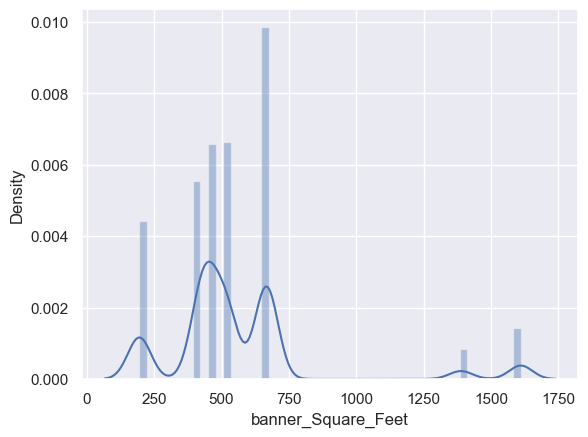

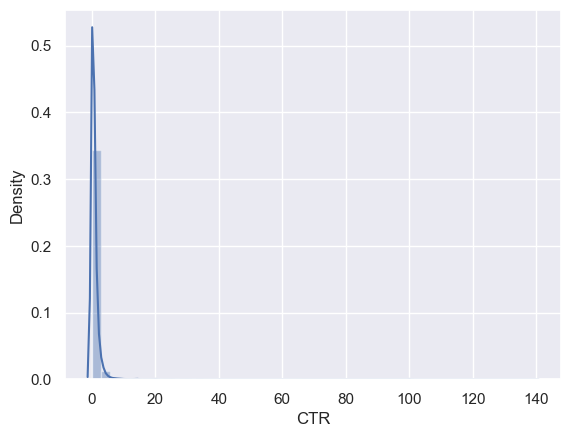

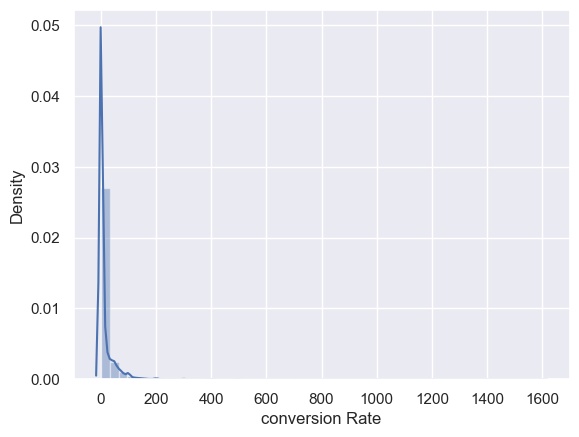

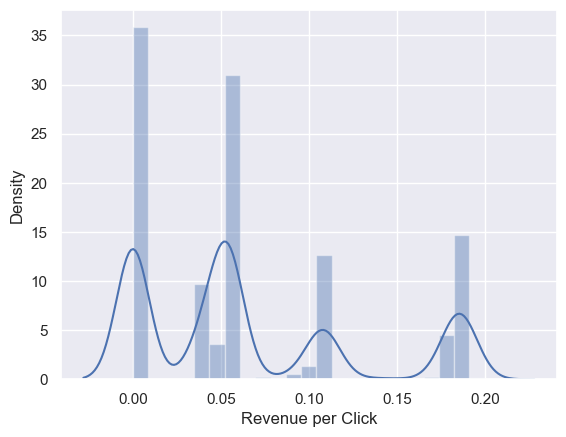

In [33]:
#displaying distplot for numerical data
for i in num:
    sns.distplot(data_clean[i])
    plt.show()

<Figure size 10000x5000 with 0 Axes>

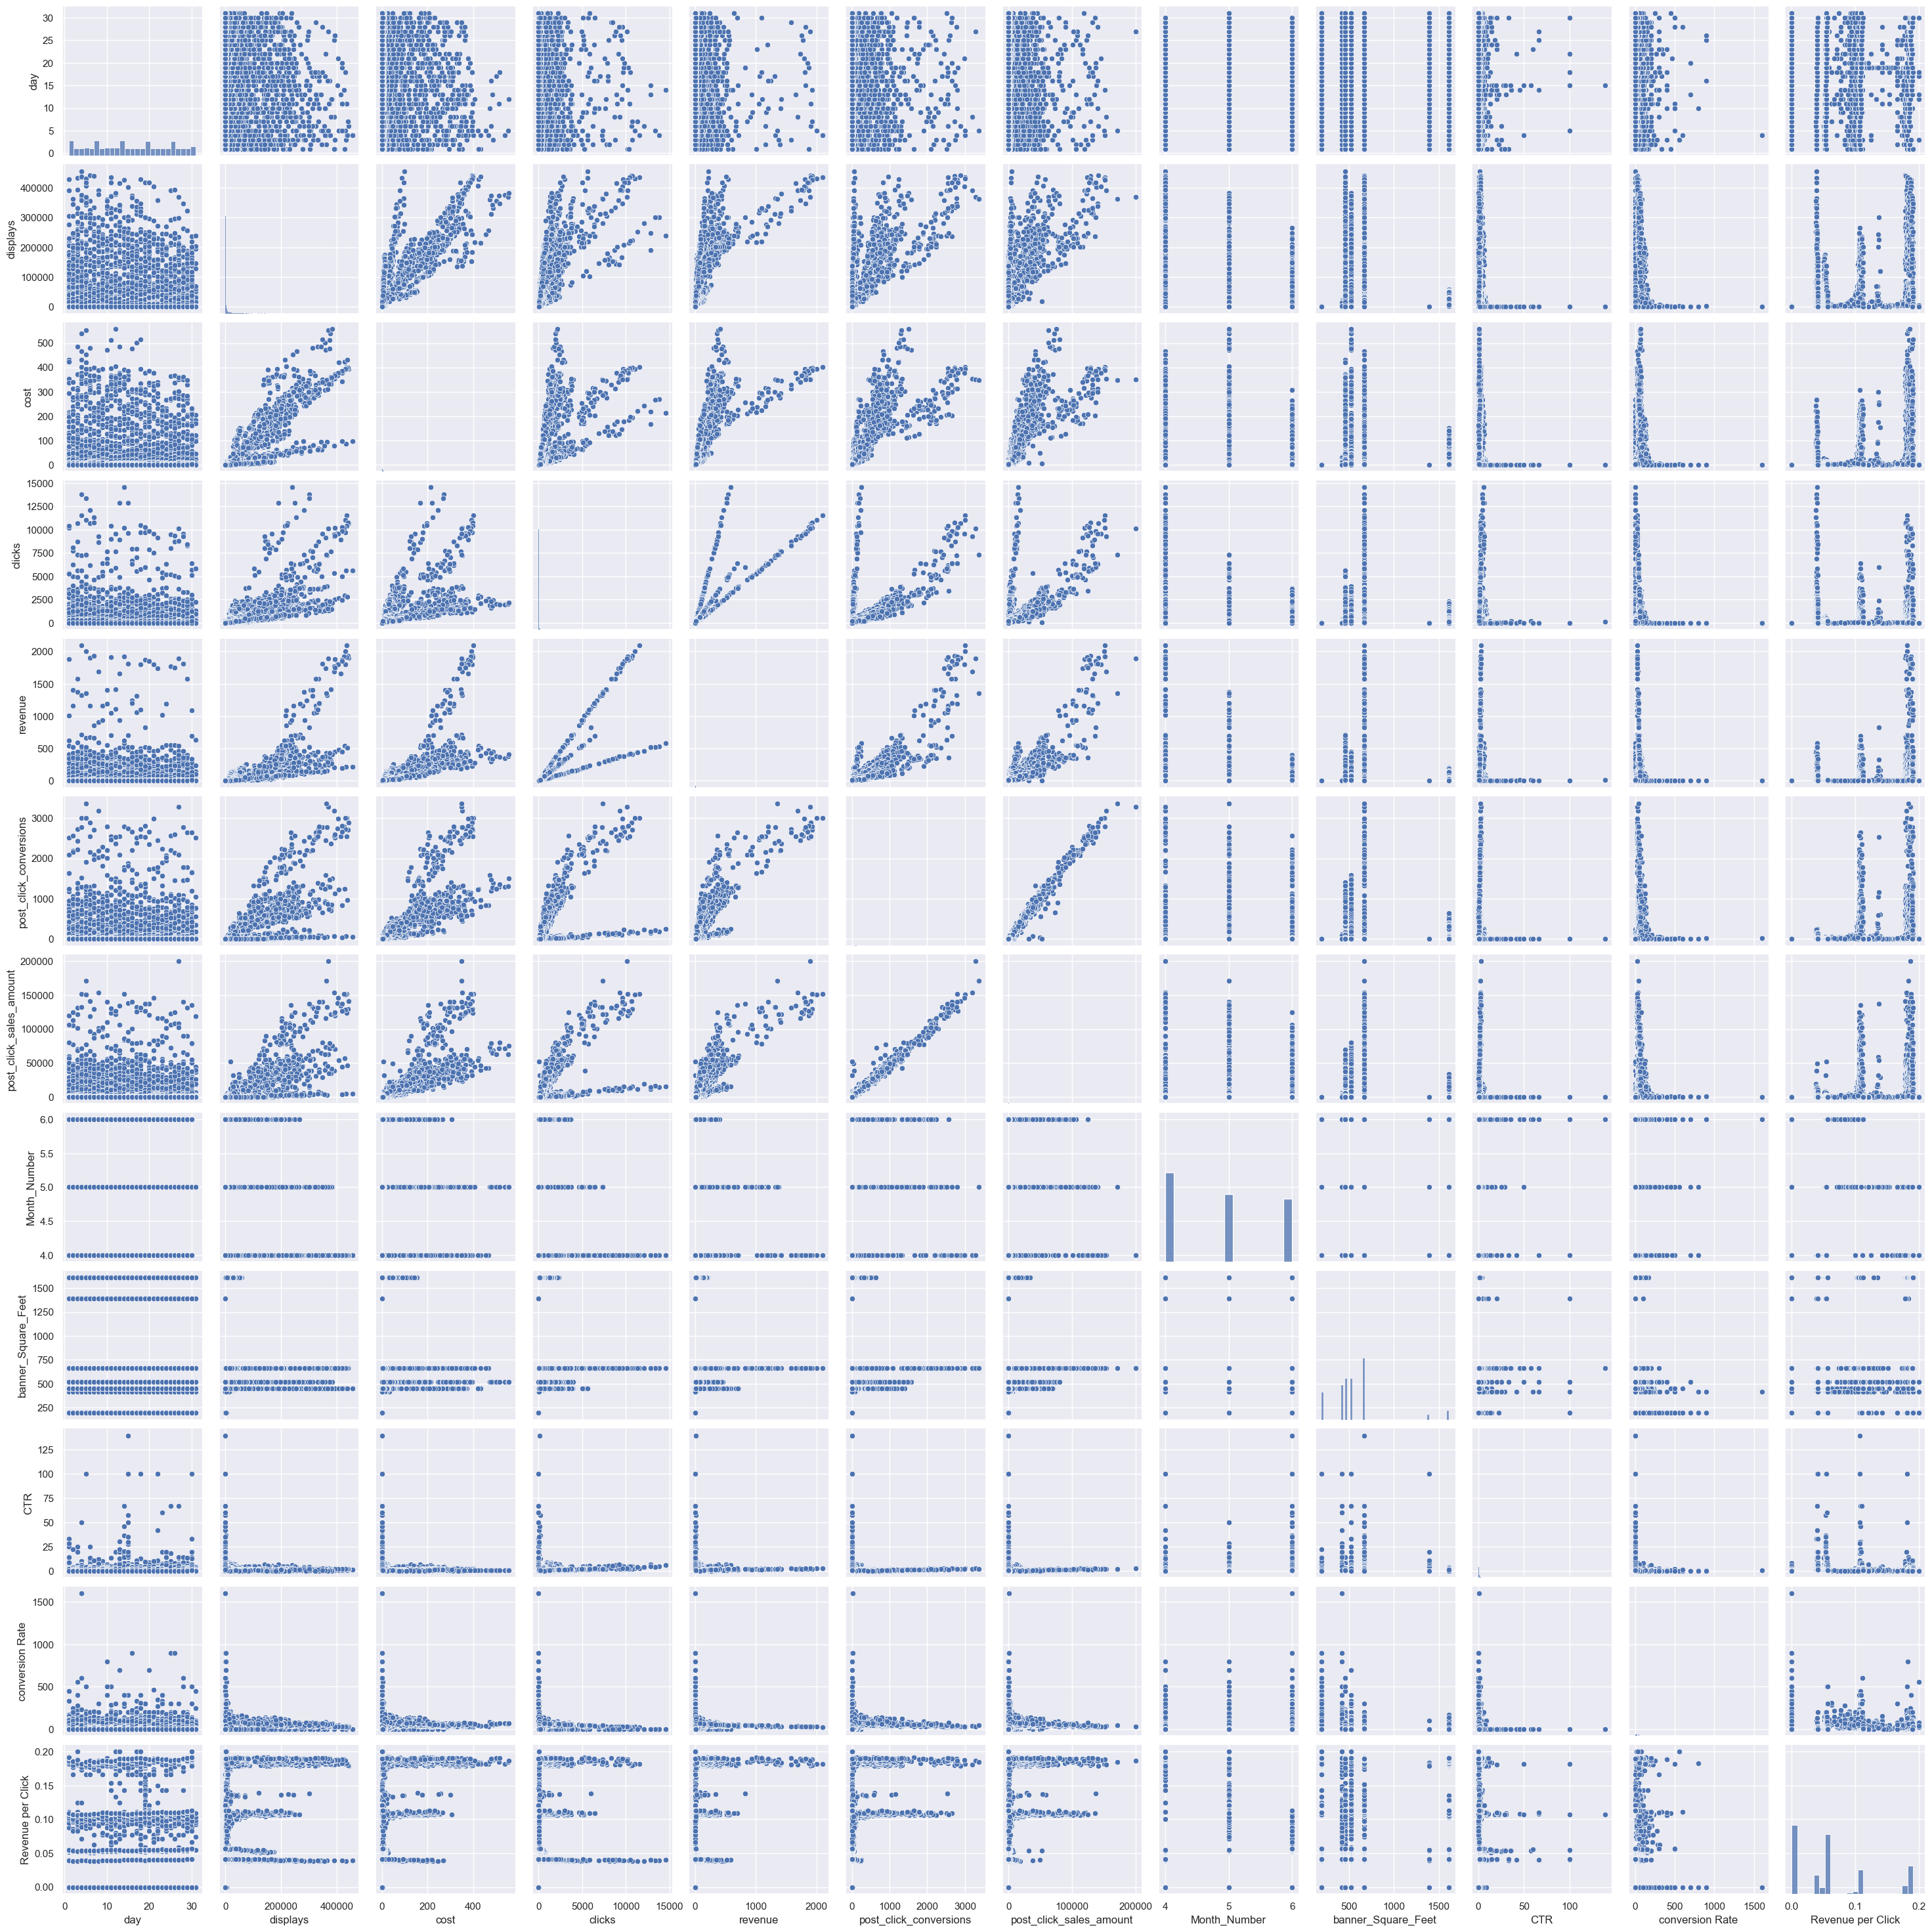

In [34]:
plt.figure(figsize=(100,50))
sns.pairplot(data_clean)
plt.show()

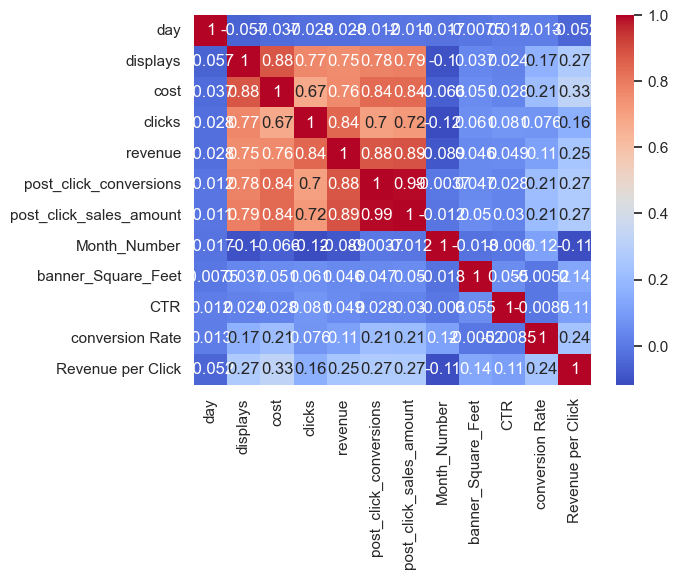

In [35]:
corr=data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

###### 3. Perform statistical analysis both Descriptive and Inferential for higher level insights


In [36]:
data_clean.describe() #printing discriptive statistics for numerical columns

,day,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Month_Number,banner_Square_Feet,CTR,conversion Rate,Revenue per Click
count,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000,14960.000000
mean,15.471858,15975.493650,11.710073,166.632286,18.466725,43.562834,2186.688888,4.881083,557.210580,0.826114,12.857884,0.065261
std,8.739404,44970.337925,46.000711,738.555736,98.169916,216.735427,10672.965459,0.823539,294.056737,3.168544,39.528602,0.064136
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,195.000000,0.000000,0.000000,0.000000
25%,8.000000,102.000000,0.030175,0.000000,0.000000,0.000000,0.000000,4.000000,418.750000,0.000000,0.000000,0.000000
50%,15.000000,1347.000000,0.380550,7.000000,0.543050,0.000000,0.000000,5.000000,520.833333,0.381456,0.000000,0.053367
75%,23.000000,9670.500000,2.719275,57.000000,4.000000,3.000000,186.303450,6.000000,666.666667,0.878859,8.333333,0.107496
max,31.000000,455986.000000,556.704800,14566.000000,2096.211600,3369.000000,199930.318000,6.000000,1611.111111,139.393939,1600.000000,0.200000


In [37]:
data_clean.describe(include='O')  #descriptive Statistics for categorical data

,month,campaign_number,user_engagement,banner,placement
count,14960,14960,14960,14960,14960
unique,3,3,3,8,5
top,April,camp 3,Medium,300 x 250,mno
freq,6068,6719,5327,2807,4495


In [38]:
from scipy.stats import ttest_ind

campaign1=data_clean[data_clean['campaign_number']=='camp 1']['displays']
campaign2=data_clean[data_clean['campaign_number']=='camp 2']['displays']
t_stat, p_val = ttest_ind(campaign1, campaign2)
print(f"T-statistic: {t_stat:4f} P-value: {p_val:4f}")


T-statistic: -4.754373 P-value: 0.000002


##### 4. Devise a strategy and machine learning model that will solve the business problem

In [39]:
data_clean

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Month_Number,banner_Square_Feet,CTR,conversion Rate,Revenue per Click
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,4,666.666667,0.000000,0.000000,0.000000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,4,666.666667,0.783342,14.556962,0.183365
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,4,666.666667,1.074757,49.367089,0.183399
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,4,666.666667,1.048704,34.354120,0.183436
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,4,666.666667,0.181159,0.000000,0.183400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397,June,30,camp 3,Medium,728 x 90,abc,911,0.5138,6,0.3378,0,0.0000,6,455.000000,0.658617,0.000000,0.056300
15398,June,30,camp 3,Medium,728 x 90,def,5963,0.7884,40,2.2513,3,69.4256,6,455.000000,0.670803,7.500000,0.056282
15399,June,30,camp 3,Medium,728 x 90,ghi,710,0.9867,22,1.2386,0,0.0000,6,455.000000,3.098592,0.000000,0.056300
15400,June,30,camp 3,Medium,728 x 90,jkl,490,0.1686,8,0.4504,0,0.0000,6,455.000000,1.632653,0.000000,0.056300


In [40]:
X=data_clean.drop(columns=['month','banner','revenue'])
y=data_clean['revenue']

In [41]:
X

,day,campaign_number,user_engagement,placement,displays,cost,clicks,post_click_conversions,post_click_sales_amount,Month_Number,banner_Square_Feet,CTR,conversion Rate,Revenue per Click
0,1,camp 1,High,abc,4,0.0060,0,0,0.0000,4,666.666667,0.000000,0.000000,0.000000
1,1,camp 1,High,def,20170,26.7824,158,23,1972.4602,4,666.666667,0.783342,14.556962,0.183365
2,1,camp 1,High,ghi,14701,27.6304,158,78,2497.2636,4,666.666667,1.074757,49.367089,0.183399
3,1,camp 1,High,mno,171259,216.8750,1796,617,24625.3234,4,666.666667,1.048704,34.354120,0.183436
4,1,camp 1,Low,def,552,0.0670,1,0,0.0000,4,666.666667,0.181159,0.000000,0.183400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397,30,camp 3,Medium,abc,911,0.5138,6,0,0.0000,6,455.000000,0.658617,0.000000,0.056300
15398,30,camp 3,Medium,def,5963,0.7884,40,3,69.4256,6,455.000000,0.670803,7.500000,0.056282
15399,30,camp 3,Medium,ghi,710,0.9867,22,0,0.0000,6,455.000000,3.098592,0.000000,0.056300
15400,30,camp 3,Medium,jkl,490,0.1686,8,0,0.0000,6,455.000000,1.632653,0.000000,0.056300


In [42]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

col=X.columns
for i in col:
    if X[i].dtype=='object':
        X[i] = encoder.fit_transform(X[i])

In [43]:
X

,day,campaign_number,user_engagement,placement,displays,cost,clicks,post_click_conversions,post_click_sales_amount,Month_Number,banner_Square_Feet,CTR,conversion Rate,Revenue per Click
0,1,0,0,0,4,0.0060,0,0,0.0000,4,666.666667,0.000000,0.000000,0.000000
1,1,0,0,1,20170,26.7824,158,23,1972.4602,4,666.666667,0.783342,14.556962,0.183365
2,1,0,0,2,14701,27.6304,158,78,2497.2636,4,666.666667,1.074757,49.367089,0.183399
3,1,0,0,4,171259,216.8750,1796,617,24625.3234,4,666.666667,1.048704,34.354120,0.183436
4,1,0,1,1,552,0.0670,1,0,0.0000,4,666.666667,0.181159,0.000000,0.183400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15397,30,2,2,0,911,0.5138,6,0,0.0000,6,455.000000,0.658617,0.000000,0.056300
15398,30,2,2,1,5963,0.7884,40,3,69.4256,6,455.000000,0.670803,7.500000,0.056282
15399,30,2,2,2,710,0.9867,22,0,0.0000,6,455.000000,3.098592,0.000000,0.056300
15400,30,2,2,3,490,0.1686,8,0,0.0000,6,455.000000,1.632653,0.000000,0.056300


In [44]:
#splitting dataset usuing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [45]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((11220, 14), (11220,), (3740, 14), (3740,))

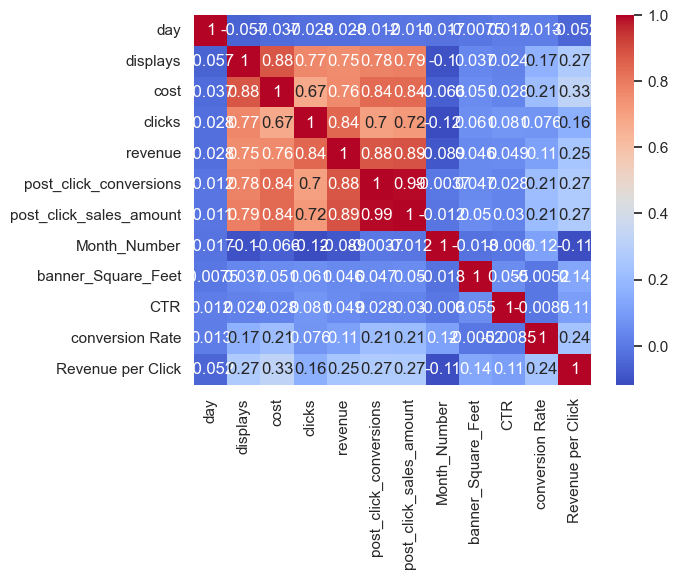

In [46]:
#checking correlation to remove high correlated columns
corr=data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [47]:
#function to identify high correlated column
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.select_dtypes(include=['number']).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [48]:
corr_features=correlation(X,0.90)

In [49]:
corr_features # high correlated column

{'post_click_sales_amount'}

In [50]:
# Removing  high correlated column from dataset
X_train.drop(corr_features,axis=1,inplace=True) 
X_test.drop(corr_features,axis=1,inplace=True)  
X_train.shape,X_test.shape

((11220, 13), (3740, 13))

In [52]:
X_train

,day,campaign_number,user_engagement,placement,displays,cost,clicks,post_click_conversions,Month_Number,banner_Square_Feet,CTR,conversion Rate,Revenue per Click
829,5,0,1,0,1,0.0007,0,0,4,666.666667,0.000000,0.000000,0.000000
8161,13,0,2,4,1899,1.2978,8,1,5,418.750000,0.421274,12.500000,0.189837
13437,16,2,0,2,96,0.0875,0,0,6,418.750000,0.000000,0.000000,0.000000
13857,19,2,2,2,77,0.0465,0,0,6,418.750000,0.000000,0.000000,0.000000
6215,30,2,2,4,22540,1.6971,74,2,4,666.666667,0.328305,2.702703,0.054623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,26,2,1,0,6,0.0094,0,0,4,666.666667,0.000000,0.000000,0.000000
13801,19,0,1,3,11,0.0041,0,0,6,455.000000,0.000000,0.000000,0.000000
5563,27,1,2,4,176628,35.6771,2559,34,4,455.000000,1.448808,1.328644,0.040061
860,5,0,2,1,4956,3.1381,25,3,4,520.833333,0.504439,12.000000,0.181456


Mean absolute error 8.848837890129849
Mean Sqaured error 712.8026892092391
Root Mean Sqaured error 26.69836491639964
R2 Score 0.8741811477039597


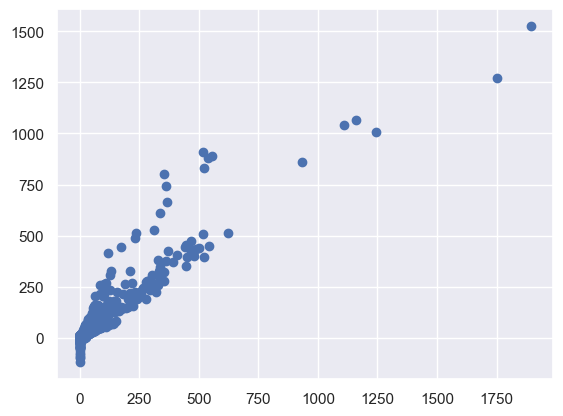

In [59]:
# Linear Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
linreg=LinearRegression(n_jobs=-1)
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("Mean Sqaured error",mse)
print("Root Mean Sqaured error",rmse)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [60]:
# Standardising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

### Lasso 

Mean absolute error 7.537800233221699
Mean Sqaured error 700.8347131362506
Root Mean Sqaured error 26.473283006386847
R2 Score 0.8762936495738395


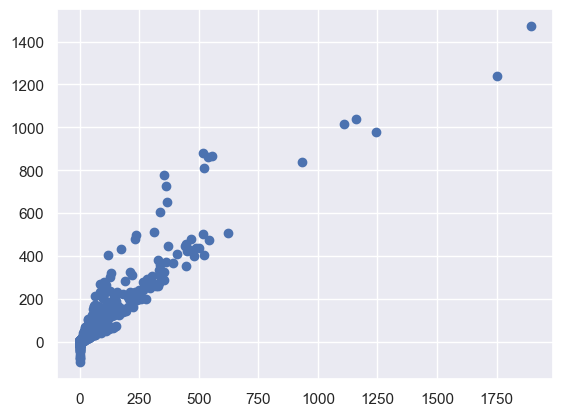

In [67]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
Lasso=Lasso()
Lasso.fit(X_train_sc,y_train)
y_pred=Lasso.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("Mean Sqaured error",mse)
print("Root Mean Sqaured error",rmse)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### LassoCV

In [55]:
from sklearn.linear_model import LassoCV
LassoCV=LassoCV(cv=5,verbose=True,n_jobs=-1)
LassoCV.fit(X_train_sc,y_train)
y_pred=LassoCV.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('best alpha values=',LassoCV.alpha_)
print("Mean absolute error", mae)
print("Mean Sqaured error",mse)
print("Root Mean Sqaured error",rmse)
print("R2 Score", score)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
................................................................................................................................................................................................................................................................................................................................................................................................................

best alpha values= 0.2816755778075215
Mean absolute error 8.367716245380816
Mean Sqaured error 703.7851783003705
Root Mean Sqaured error 26.528949815255984
R2 Score 0.8757728544838255


....................................................................................................[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


### Ridge

Mean absolute error 8.847209370576214
Mean Sqaured error 712.692529887428
Root Mean Sqaured error 26.696301801699576
R2 Score 0.8742005922426095


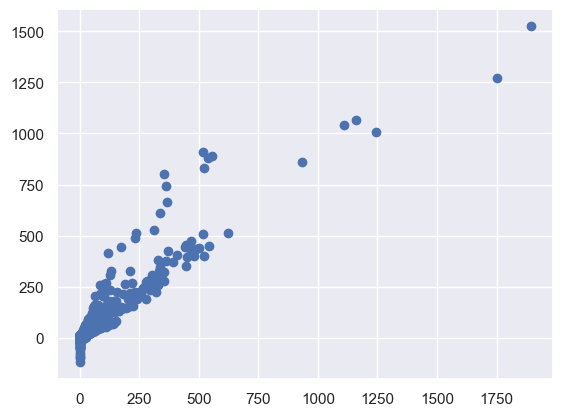

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
Ridge=Ridge()
Ridge.fit(X_train_sc,y_train)
y_pred=Ridge.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("Mean Sqaured error",mse)
print("Root Mean Sqaured error",rmse)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### RidgeCV

best alpha values 10.0
Mean absolute error 8.83263555569189
Mean Sqaured error 711.7156037452163
Root Mean Sqaured error 26.67799849586202
R2 Score 0.8743730322850669


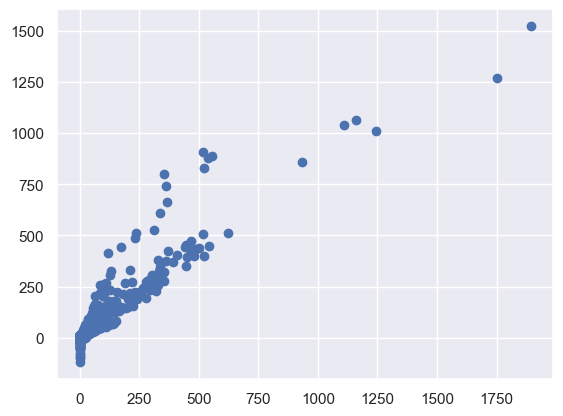

In [57]:
from sklearn.linear_model import RidgeCV
RidgeCV=RidgeCV(cv=5)
RidgeCV.fit(X_train_sc,y_train)
y_pred=RidgeCV.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('best alpha values',RidgeCV.alpha_)
print("Mean absolute error", mae)
print("Mean Sqaured error",mse)
print("Root Mean Sqaured error",rmse)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### Elastic Net

Mean absolute error 7.924238886793449
Mean Sqaured error 834.7000317341617
Root Mean Sqaured error 28.89117567241184
R2 Score 0.8526646972659886


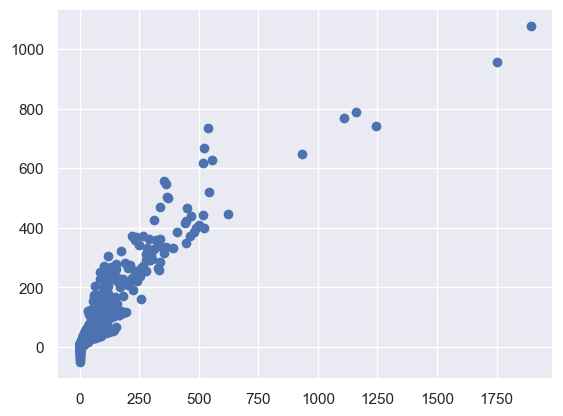

In [58]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
ElasticNet=ElasticNet()
ElasticNet.fit(X_train_sc,y_train)
y_pred=ElasticNet.predict(X_test_sc)
mse=mean_squared_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("Mean Sqaured error",mse)
print("Root Mean Sqaured error",rmse)
print("R2 Score", score)
plt.scatter(y_test,y_pred)